In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
train_data_dir = r'C:\Users\ASUS VivoBook\Downloads\apple'

# Set up the training data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

# Set up the validation data generator
validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 2537 images belonging to 4 classes.
Found 634 images belonging to 4 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
79/79 [==============================] - 253s 3s/step - loss: 0.6666 - accuracy: 0.7345 - val_loss: 0.3655 - val_accuracy: 0.8750
Epoch 2/50
79/79 [==============================] - 244s 3s/step - loss: 0.3138 - accuracy: 0.8822 - val_loss: 0.2673 - val_accuracy: 0.8997
Epoch 3/50
79/79 [==============================] - 234s 3s/step - loss: 0.2202 - accuracy: 0.9206 - val_loss: 0.2318 - val_accuracy: 0.9145
Epoch 4/50
79/79 [==============================] - 232s 3s/step - loss: 0.2150 - accuracy: 0.9289 - val_loss: 0.2081 - val_accuracy: 0.9211
Epoch 5/50
79/79 [==============================] - 240s 3s/step - loss: 0.2088 - accuracy: 0.9277 - val_loss: 0.2869 - val_accuracy: 0.8964
Epoch 6/50
79/79 [==============================] - 236s 3s/step - loss: 0.1343 - accuracy: 0.9525 - val_loss: 0.1785 - val_accuracy: 0.9457
Epoch 7/50
79/79 [==============================] - 232s 3s/step - loss: 0.1159 - accuracy: 0.9577 - val_loss: 0.1647 - val_accuracy: 0.9342
Epoch 8/50
79

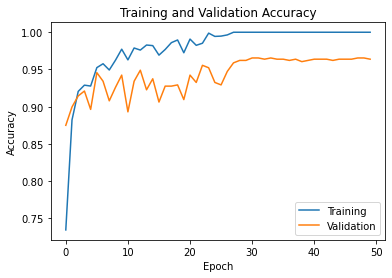

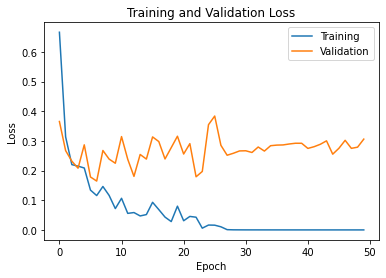

In [6]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Training', 'Validation'])
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()